In [1]:
import json
import pickle
import folium
from pyproj import Proj
import matplotlib.pyplot as plt
from shapely.geometry import Polygon
from eviltransform import gcj2wgs, bd2wgs, bd2gcj, wgs2gcj
projector = Proj("+proj=utm +zone=50 +ellps=WGS84 +datum=WGS84 +units=m +no_defs")
regions = pickle.load(open("data/regions_all.pkl", "rb"))
WGS = 0
GCJ = 1
BD = 2

In [63]:
# 手标数据
bds = [
    # [
    #     "和平街十二区20号楼",  # 楼名
    #     True,  # 电梯楼写True, 楼梯楼写False
    #     GCJ,  # 从高德取的坐标, 写GCJ; 从百度写的坐标, 写BD
    #     (116.428276,39.968905),  # 取一个楼里的点(小哥在楼里送单的时候会走到这个点, 看起来真实即可)
    #     [(116.427821,39.96892), (116.42869,39.96894), (116.428701,39.968829), (116.427816,39.968813)],   # 楼的边界点, 按顺时针或逆时针排列(最后一点不需要与第一点相同, 例如, 长方形楼取4个点即可)
    # ],

    ["和平街十二区20号楼", True, GCJ, (116.428276,39.968905), [(116.427821,39.96892), (116.42869,39.96894), (116.428701,39.968829), (116.427816,39.968813)]],
    ["和平街十二区19号楼", True, GCJ, (116.426999,39.96902), [(116.426276,39.969039), (116.427666,39.969072), (116.427666,39.968969), (116.426276,39.968932)]],
    ["和平街十二区18号楼", False, GCJ, (116.426656,39.968757), [(116.426285,39.968598), (116.426282,39.968735), (116.426346,39.968735), (116.426357,39.968813), (116.426904,39.968821), (116.426904,39.968722), (116.4264,39.968702), (116.426387,39.968595)]],
    ["和平街十二区17号楼", False, GCJ, (116.426044,39.968518), [(116.425761,39.968545), (116.426303,39.968566), (116.426314,39.968439), (116.425767,39.968418)]],
    ["和平街十二区11号楼", False, GCJ, (116.425422,39.96853), [(116.425202,39.968559), (116.425625,39.968563), (116.425625,39.968452), (116.425212,39.968444)]],
    ["和平街十二区9号楼", False, GCJ, (116.425229,39.968206), [(116.425169,39.968431), (116.425255,39.968435), (116.425271,39.967868), (116.425186,39.967864)]],
    ["和平街十二区10号楼", False, GCJ, (116.425594,39.968292), [(116.42537,39.968319), (116.425788,39.968323), (116.425793,39.968233), (116.42537,39.968221)]],
    ["和平街十二区8号楼", False, GCJ, (116.425599,39.967971), [(116.425364,39.967999), (116.425793,39.968007), (116.425777,39.967925), (116.425364,39.967916)]],
    ["和平街十二区16号楼", False, GCJ, (116.426028,39.968025), [(116.425906,39.96806), (116.426121,39.968069), (116.426121,39.967974), (116.426314,39.967978), (116.426308,39.968311), (116.426389,39.968307), (116.42641,39.967892), (116.426131,39.967879), (116.426121,39.967925), (116.425906,39.967921)]],
    ["和平街十二区7号楼", False, GCJ, (116.425502,39.967733), [(116.425219,39.967736), (116.425756,39.96776), (116.425751,39.967694), (116.425327,39.967682), (116.425316,39.967534), (116.425225,39.96753)]],
    ["和平街十二区12号楼", False, GCJ, (116.426162,39.967679), [(116.42596,39.967707), (116.426367,39.967715), (116.426378,39.967596), (116.426432,39.967592), (116.426437,39.967411), (116.426249,39.967415), (116.426244,39.967596), (116.425965,39.967596)]],
    ["和平街十二区5号楼", False, GCJ, (116.425331,39.967091), [(116.425219,39.967279), (116.425316,39.967279), (116.425316,39.96737), (116.425413,39.967361), (116.425429,39.96686), (116.425236,39.966852)]],
    ["和平街十二区15号楼", False, GCJ, (116.426157,39.967264), [(116.425847,39.967279), (116.426421,39.967296), (116.426426,39.967205), (116.425852,39.967197)]],
    ["和平街十二区6号楼", False, GCJ, (116.42569,39.967005), [(116.425504,39.967016), (116.425869,39.967016), (116.425847,39.966942), (116.425498,39.966934)]],
    ["和平街十二区14号楼", False, GCJ, (116.426093,39.967005), [(116.425922,39.967024), (116.426287,39.967032), (116.426282,39.966963), (116.425912,39.96695)]],
    ["和平街十二区4号楼", False, GCJ, (116.425433,39.966504), [(116.425209,39.96665), (116.425305,39.966646), (116.425316,39.966514), (116.425761,39.966519), (116.425761,39.966453), (116.425225,39.966445)]],
    ["和平街十二区13号楼", False, GCJ, (116.426146,39.966516), [(116.425815,39.966794), (116.425922,39.966794), (116.425928,39.966547), (116.42633,39.966551), (116.42633,39.966802), (116.426426,39.966806), (116.426437,39.966469), (116.42582,39.966457)]],
    ["和平街十二区3号楼", False, GCJ, (116.425513,39.96622), [(116.425171,39.966235), (116.425777,39.966255), (116.425799,39.966058), (116.42567,39.966054), (116.425665,39.966157), (116.425295,39.966157), (116.425295,39.966042), (116.425177,39.966038)]],
    
    ["和平街十二区甲1号楼", False, GCJ, (116.425288,39.965747), [(116.425214,39.965947), (116.425338,39.965943), (116.425343,39.965495), (116.425225,39.965495)]],
    ["和平街十二区甲3号楼", False, GCJ, (116.42561,39.965874), [(116.425498,39.965918), (116.425729,39.965922), (116.42574,39.965844), (116.425692,39.965844), (116.425692,39.965774), (116.425541,39.965778), (116.425541,39.965844), (116.425493,39.965844)]],
    ["和平街十二区甲2号楼", False, GCJ, (116.42561,39.96557), [(116.425498,39.965639), (116.425729,39.965639), (116.425729,39.965552), (116.425681,39.965552), (116.425681,39.965491), (116.425531,39.965482), (116.425531,39.965569), (116.425498,39.965569), (116.425504,39.965614)]],
    ["和平街十二区1号楼", False, GCJ, (116.425561,39.96527), [(116.425252,39.965392), (116.425375,39.965388), (116.42538,39.965306), (116.425745,39.965306), (116.425751,39.9654), (116.425852,39.965396), (116.425863,39.965191), (116.425262,39.965195)]],
    
    ["和平街十二区24号楼或化研院南小区5号楼或和平街十二区甲5号楼", False, GCJ, (116.427396,39.965607), [(116.426791,39.965627), (116.427575,39.965648), (116.42758,39.965685), (116.427897,39.965689), (116.427902,39.965525), (116.427585,39.965521), (116.427591,39.965549), (116.426797,39.965533)]],
    ["和平街十二区22号楼或化研院南小区22号楼", True, GCJ, (116.428571,39.965615), [(116.428049,39.965681), (116.429068,39.965693), (116.429071,39.965533), (116.428052,39.965521)]],
    ["和平街十二区23号楼", False, GCJ, (116.429687,39.965648), [(116.429219,39.965706), (116.430139,39.965722), (116.430144,39.965558), (116.429216,39.965541)]],
    ["和平街十二区25号楼", True, GCJ, (116.429655,39.966039), [(116.42916,39.966076), (116.430114,39.966117), (116.430123,39.96594), (116.429152,39.96592)]],

    

    ["和平街十五区2号楼", True, GCJ, (116.430447,39.966292), [(116.430235,39.966409), (116.43031,39.966417), (116.430305,39.966347), (116.430589,39.966343), (116.430589,39.96638), (116.430691,39.966368), (116.430691,39.966277), (116.430654,39.966232), (116.430273,39.966228), (116.430267,39.966277), (116.430219,39.966273)]],
    ["和平街十五区1号楼", True, GCJ, (116.431037,39.966584), [(116.430836,39.966684), (116.430943,39.966651), (116.430949,39.966623), (116.431147,39.966614), (116.431142,39.966651), (116.431228,39.966676), (116.431228,39.966565), (116.431174,39.966573), (116.431185,39.966512), (116.430895,39.966503), (116.4309,39.966553), (116.430847,39.966553)]],
    ["和平街十五区3号楼", True, GCJ, (116.431123,39.965918), [(116.430921,39.966009), (116.431018,39.966014), (116.431029,39.965964), (116.431221,39.965981), (116.431221,39.966014), (116.431291,39.966034), (116.431291,39.965915), (116.431264,39.965907), (116.431248,39.965857), (116.430963,39.965857), (116.430969,39.965903), (116.43091,39.965898)]],
    ["和平街十五区4号楼", True, BD, (116.437021,39.971653), [(116.436774,39.97175), (116.436882,39.97175), (116.436882,39.971698), (116.437151,39.971698), (116.437147,39.97175), (116.437268,39.97175), (116.437268,39.971646), (116.437214,39.971646), (116.43721,39.971598), (116.436846,39.971598), (116.436846,39.971653), (116.436769,39.971653)]],
    ["和平街十五区5号楼", True, BD, (116.43769,39.971273), [(116.43752,39.971377), (116.437618,39.971377), (116.437623,39.971325), (116.437771,39.971321), (116.437771,39.97137), (116.437843,39.97137), (116.437843,39.971262), (116.437803,39.971262), (116.437803,39.971218), (116.437591,39.971218), (116.437582,39.971273), (116.437524,39.971273)]],
    ["和平街十五区10号楼", False, BD, (116.437753,39.972192), [(116.43769,39.972403), (116.437807,39.972406), (116.437825,39.972016), (116.437704,39.972037)]],
    ["和平街十五区11号楼", False, BD, (116.437771,39.971567), [(116.437699,39.971819), (116.437789,39.971819), (116.437825,39.971401), (116.437731,39.971404)]],
    ["和平街十五区6号楼", True, BD, (116.437088,39.971045), [(116.436855,39.971142), (116.436949,39.971142), (116.436945,39.971103), (116.437214,39.971093), (116.437214,39.971135), (116.437331,39.971135), (116.437331,39.971027), (116.437286,39.971045), (116.437286,39.970993), (116.436891,39.970993), (116.436891,39.971038), (116.436855,39.971038)]],
    ["和平街十五区13号楼", False, BD, (116.437111,39.970737), [(116.436877,39.970882), (116.437196,39.970882), (116.437196,39.970554), (116.437034,39.970554), (116.43703,39.970813), (116.436882,39.970817)]],
    ["和平街十五区7号楼", True, BD, (116.437861,39.970557), [(116.437753,39.971003), (116.437883,39.971), (116.437906,39.97015), (116.43778,39.970157), (116.437762,39.970257), (116.437825,39.970253), (116.437807,39.970907), (116.437753,39.970907)]],
    ["和平街十五区8号楼", True, BD, (116.437093,39.970226), [(116.436855,39.970309), (116.436981,39.970305), (116.436981,39.970267), (116.437241,39.970267), (116.437241,39.970309), (116.437344,39.970309), (116.43734,39.970208), (116.437299,39.970208), (116.437308,39.97017), (116.436886,39.970174), (116.436891,39.970215), (116.43685,39.970212)]],
    ["和平街十五区9号楼", True, BD, (116.437344,39.969669), [(116.436882,39.969718), (116.437443,39.969714), (116.437448,39.970004), (116.437578,39.970008), (116.437582,39.969645), (116.437457,39.969645), (116.437457,39.969611), (116.437457,39.969614), (116.436882,39.969617)]],

    ["和平街十五区2号院甲1号楼", False, BD, (116.437331,39.974245), [(116.436985,39.974307), (116.437524,39.974307), (116.43752,39.974355), (116.437645,39.974355), (116.437645,39.9741), (116.437529,39.974096), (116.437524,39.974183), (116.436981,39.974183)]],
    ["和平街十五区2号院1号楼", True, BD, (116.437511,39.973896), [(116.437349,39.974), (116.437686,39.97401), (116.437699,39.973789), (116.437344,39.973789)]],
    ["和平街十五区2号院2号楼", True, BD, (116.436909,39.97392), [(116.436747,39.974038), (116.437052,39.974044), (116.437066,39.973803), (116.436751,39.973803)]],



    [
        "和平街十三区6号楼",
        False,
        BD,
        (116.432008,39.971065),
        [(116.431708,39.971107), (116.432296,39.97111), (116.432305,39.970782), (116.432229,39.970782), (116.432224,39.971031), (116.431811,39.971031), (116.431815,39.970786), (116.431703,39.970782)],
    ],
    [
        "和平街十三区17号楼",
        False,
        BD,
        (116.432848,39.971027),
        [(116.432507,39.971065), (116.433154,39.971072), (116.433154,39.970989), (116.432503,39.970983)],
    ],
    [
        "和平街十三区5号楼",
        False,
        BD,
        (116.432282,39.970405),
        [(116.43222,39.970575), (116.432336,39.970578), (116.43235,39.97024), (116.432229,39.97024)],
    ],
    [
        "和平街十三区3号楼",
        False,
        BD,
        (116.432058,39.969766),
        [(116.431748,39.970046), (116.431896,39.970036), (116.431901,39.969818), (116.432233,39.969808), (116.432242,39.970039), (116.432363,39.970039), (116.432368,39.969794), (116.432296,39.969794), (116.432291,39.969697), (116.431851,39.969707), (116.431833,39.969797), (116.431752,39.969797)],
    ],
    [
        "和平街十三区13号楼",
        False,
        BD,
        (116.432628,39.969811),
        [(116.432408,39.969856), (116.432853,39.969849), (116.432848,39.969766), (116.432404,39.969773)],
    ],
    [
        "和平街十三区15号楼",
        False,
        BD,
        (116.432691,39.97017),
        [(116.432476,39.970201), (116.432925,39.970205), (116.432911,39.970132), (116.432476,39.970129)],
    ],

    
    [
        "和平街十三区27号楼",
        False,
        BD,
        (116.432691,39.97017),
        [(116.43297,39.970205), (116.433172,39.970205), (116.433172,39.970143), (116.433298,39.970146), (116.433315,39.969873), (116.433181,39.96987), (116.433181,39.96979), (116.432997,39.969787), (116.432997,39.969901), (116.433158,39.969901), (116.433158,39.970094), (116.43297,39.970094)],
    ],
    [
        "煤炭科学研究总院4号楼",
        False,
        BD,
        (116.434209,39.970772),
        [(116.433464,39.970924), (116.433684,39.970917), (116.433688,39.970865), (116.43473,39.970848), (116.43473,39.9709), (116.434923,39.970896), (116.434937,39.970661), (116.434739,39.970661), (116.434726,39.970699), (116.433684,39.970713), (116.433684,39.970647), (116.433459,39.970651)],
    ],
    [
        "煤炭科学研究总院5号楼",
        False,
        BD,
        (116.435588,39.970592),
        [(116.435175,39.970647), (116.435579,39.970637), (116.435602,39.970689), (116.435974,39.970699), (116.435992,39.970502), (116.435175,39.970509)],
    ],
    [
        "煤炭科学研究总院7号楼",
        False,
        BD,
        (116.43632,39.970862),
        [(116.43619,39.970927), (116.436455,39.97092), (116.43646,39.97081), (116.43619,39.970817)],
    ],


    [
        "和平街十三区38号楼",
        False,
        BD,
        (116.433122,39.969189),
        [(116.433037,39.969414), (116.433208,39.969414), (116.433208,39.968992), (116.433033,39.968999)],
    ],
    [
        "和平街十三区37号楼",
        False,
        BD,
        (116.432642,39.969517),
        [(116.432386,39.9696), (116.432898,39.9696), (116.432902,39.969424), (116.432372,39.969434)],
    ],
    [
        "和平街十三区36号楼",
        False,
        BD,
        (116.43204,39.96923),
        [(116.431946,39.969465), (116.432148,39.969462), (116.432139,39.969016), (116.431941,39.96902)],
    ],

]

# 转为统一数据格式
buildings = []
for i, (name, is_elevator, ctype, gate, points) in enumerate(bds):
    if points[0] != points[-1]:
        points += [points[0]]
    if ctype == BD:
        gate_gps = bd2wgs(*gate[::-1])[::-1]
        gate_xy = projector(*gate_gps)
        points = [bd2wgs(*p[::-1])[::-1] for p in points]
    else:
        assert ctype == GCJ
        gate_gps = gcj2wgs(*gate[::-1])[::-1]
        gate_xy = projector(*gate_gps)
        points = [gcj2wgs(*p[::-1])[::-1] for p in points]
    buildings.append({
        "id": i,
        "name": name,
        "points": points,
        "is_elevator": is_elevator,
        "gate_gps": gate_gps,
        "gate_xy": gate_xy,
        "gate_id": str(i)
    })
print(len(buildings))

54


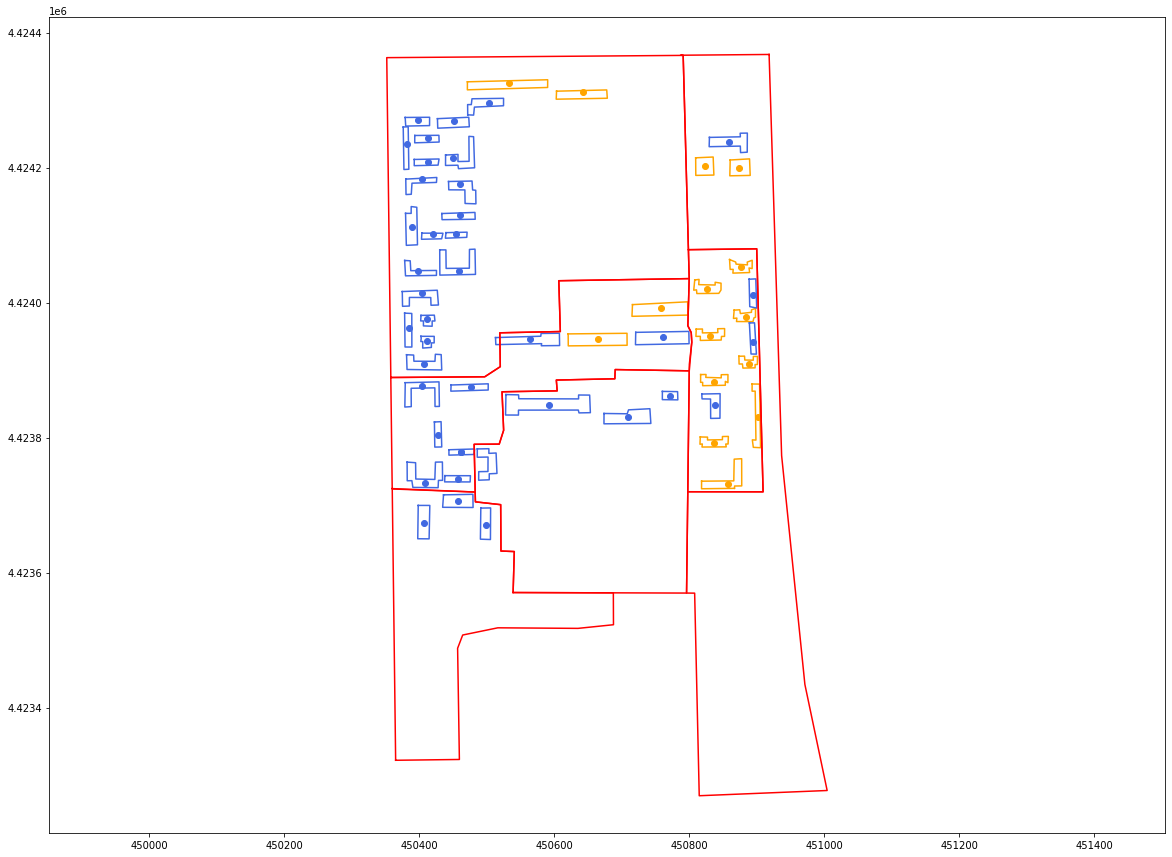

In [62]:
# 用matplotlib画图快速验证标点是否正确
plt.figure(figsize=(20, 15))
plt.axis("equal")
tmp = []
for bd in buildings:
    color = "orange" if bd["is_elevator"] else "royalblue"
    xys = [projector(*p) for p in bd["points"]]
    plt.plot(*zip(*xys), c=color)
    plt.scatter(*bd["gate_xy"], c=color)
    tmp.append(Polygon(xys))
for region in regions:
    xys = [projector(*p) for p in region["boundary"]]
    for p in tmp:
        if Polygon(xys).intersects(p):
            plt.plot(*zip(*xys), c="red")
            break
plt.show()

In [32]:
# 画在folium上更精确地看标点是否正确
G_folium = folium.Map(
    location=[39.967691, 116.426234],
    control_scale=True,
    tiles='http://webrd02.is.autonavi.com/appmaptile?lang=zh_cn&size=1&scale=1&style=8&x={x}&y={y}&z={z}',
    attr='高德底图',
    zoom_start=20,
)
for bd in buildings:
    color = "orange" if bd["is_elevator"] else "royalblue"
    folium.PolyLine(
        locations=[wgs2gcj(*p[::-1]) for p in bd["points"]],
        opacity=0.8,
        weight=3,
        popup=(bd["id"], bd["name"]),
        color=color,
    ).add_to(G_folium)
    folium.CircleMarker(
        location=wgs2gcj(*bd["gate_gps"][::-1]),
        opacity=0.8,
        radius=3,
        fill=True,   
        popup=(bd["gate_id"], bd["name"]),
        color=color,
    ).add_to(G_folium)
for r in regions:
    folium.PolyLine(
        locations=[wgs2gcj(*p[::-1]) for p in r["boundary"]],
        opacity=0.8,
        weight=2,
        popup=r["rid"],
        color="red",
    ).add_to(G_folium)
G_folium.save("test.html")